## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [54]:
#importing the libraries
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import f1_score
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
import contractions
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [62]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train',remove=('headers', 'quotes'))

mydata_test = fetch_20newsgroups(subset='test',remove=('headers', 'quotes'))


In [63]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [64]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [65]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [66]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [67]:
text_label = mydata_train.target
test_label = mydata_test.target

In [68]:
# Preprocessing the data
import contractions

lines = [] 
word_list = [] 
train_labels = []
 
# tokenization takes here which do updates list word_list and lines
for i,(line,label) in enumerate(zip(text,text_label)):
    print('Doc {} of {}'.format(i+1,len(text)),end='\r')
    expanded_words = []   
    for word in line.split():
        expanded_words.append(contractions.fix(word))
    line = ' '.join(expanded_words)
    
    line = re.sub(r'\W+', ' ', line)
    line = re.sub(r'\d+', '', line)
    #print('Line after preprocessing is \n', line)
    if len(word_tokenize(line))!=0:
        lines.append(word_tokenize(line))
        train_labels.append(label)
    word_list.extend(word_tokenize(line)) 

# Make sure the word_list contains unique tokens
word_list_unique = list( dict.fromkeys(word_list))
print()
print('Vocabulary count ', len(word_list_unique))

# Calculate the total documents present in the corpus
total_docs = len(lines)
print('Total number of docs after clean-up is: ',total_docs)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
for i,word in enumerate(word_list_unique):
    dict_idx[word] = i
   

Doc 11314 of 11314
Vocabulary count  109574
Total number of docs after clean-up is:  11288


In [69]:
# Create a frequency dictionary
 
def frequency_dict(lines, word_list_unique):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for i,eachWord in enumerate(word_list_unique):
        print('Word {} of {}'.format(i+1,len(word_list_unique)),end='\r')
        word_doc_count = 0
        for eachLine in lines:
            if eachWord in eachLine:
                word_doc_count+=1 
                freq_word[eachWord] = word_doc_count
    
    
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines, word_list_unique)
print()
with open('freq_word.txt', 'w') as data:
    data.write(str(freq_word))
    

In [ ]:
#Read dictionary from text file
import ast
  
# reading the data from the file
with open('freq_word.txt') as f:
    data = f.read()
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
freq_word = ast.literal_eval(data)
  
print("Data type after reconstruction : ", type(freq_word))
#print(d)

In [13]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    numberofwords = len(document)
    countofword = 0
    if word in document:
        countofword = document.count(word)
    
    tf = countofword/numberofwords
    
    return tf

In [18]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word,lines):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''

    numofdocs = len(lines) 
    
    idf = np.log(numofdocs/(freq_word[word]+1)) 
    
    return idf

In [19]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''

    tf_idf_vec = []
    for i,eachSentence in enumerate(sentence):
        print('Sentence {} of {}'.format(i+1,len(sentence)),end='\r')
        samplefeatures = [0] * len(dict_idx)
        
        for eachWord in eachSentence:
            if eachWord in dict_idx:
                samplefeatures[dict_idx[eachWord]] = term_frequency(eachSentence,eachWord) * inverse_df(eachWord,sentence)
            
        tf_idf_vec.append(samplefeatures)
        
    return tf_idf_vec

Tf-IDF is the feature vector. So, its shape should be (n_samples,n_features) where n_samples is the number of documents in the dataset i.e. 11314 and the n_features is the vocabulary length since we are associating a number(tf-idf) with each unique word in the vocabulary

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

tf_idf_vec = tfidf(lines, dict_idx)
print()

In [ ]:
print(type(tf_idf_vec))

tf_idf_vec = np.asarray(tf_idf_vec)

print(tf_idf_vec.shape)
# class : approximately 11004 or more list 99374 . Its 10.1G that needs to be get into the array depending upon the GPU it will show

## Multinomial Naive Bayes (10 Points)

In [31]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB(alpha=.01)
model.fit(tf_idf_vec, train_labels)


MultinomialNB(alpha=0.01)

In [32]:
#Perform testing on the train dataset

# Perform all pre-processing and feature extraction on the test data

pred = model.predict(tf_idf_vec)

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(train_labels, pred, average='macro')
Accuracy = metrics.accuracy_score(train_labels, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

#F1 Score:  0.9853457835628475
#Accuracy:  0.9834562952289263

### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

In [ ]:
# Testing of the  vectors

test_lines = [] 
test_labels = []
 

for i,(line,label) in enumerate(zip(test,test_label)):
    
    print('Doc {} of {}'.format(i+1,len(test)),end='\r')
    
    expanded_words = []   
    for word in line.split():
        expanded_words.append(contractions.fix(word))
    line = ' '.join(expanded_words)
    
    line = re.sub(r'\W+', ' ', line)
    line = re.sub(r'\d+', '', line)
    #print('Line after preprocessing is \n', line)
    if len(word_tokenize(line))!=0:
        test_lines.append(word_tokenize(line))
        test_labels.append(label)

In [ ]:
test_tf_idf = tfidf(test_lines, dict_idx)
print()

In [ ]:
test_pred = model.predict(test_tf_idf)


F1_score = metrics.f1_score(test_labels, test_pred, average='macro')
Accuracy = metrics.accuracy_score(test_labels, test_pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

#F1 Score:  0.6735684921245673
#Accuracy:  0.7345783528492727

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [27]:
# install libraries
#pip install wikipedia

In [43]:
import wikipedia
from wikipedia.exceptions import WikipediaException
import random
import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd
'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

# list of articles to be downloaded
articles =["Football", "College Football", "Association Football", "International Football","Basketball", 
           "Bank of America", "Visa Inc.", "Santander Bank",
           "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science",
           "Northeastern Unversity", "Boston University", "Suffolk University", "Harvard University",
           "Facebook", "Twitter", "Instagram", "Snapchat",
           "Mexico", "Canada", "Germany", "Poland", "India",
           "Albert Einstein", "Marie Curie", "Nikola Tesla", "Charles Darwin",
           "Cadbury", "The Hershey Company", "Nestle", "Ferrero Rocher",
            "BWM", "Mercedes Benz", "volkswagen", "chevrolet"]

# download and store articles (summaries) in this variable
data=[]
art=[]
#labels=[]    
for article in articles:
    try:
        page_article = wikipedia.page(article)
        data.append(page_article.content)
        art.append(article)
        #labels.append(i+1)
    except WikipediaException:
        continue        


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer:** 
Data cleaning is very neceesary. This step removes umimportant  such as stop words , deimeters words that doesn't add vale to the model and can further reduce the dimentionality of the model . This also affects the clustering of the model too 

**Answer(1-3 sentences):** 

In [44]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# You can use Assignment 1's clean message function

def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #To remove punctuation
    message_processed = ""
    for word in message:
        if word not in string.punctuation:
            message_processed += "".join(word)
            
   #To make lower case
    message_processed = message_processed.lower()
    
    #Tokenization
    message_processed = word_tokenize(message_processed)
    
    #Stop word removal
    message_clean= []
    stopwords = nltk.corpus.stopwords.words('english')
    for word in message_processed:
         if word not in stopwords:
            message_clean.append(word)
    
    #Stemming
    messages_cleaned= []
    porter_stemmer = PorterStemmer()
    for word in message_processed:
        messages_cleaned.append(porter_stemmer.stem(word))
        
    cleaned_message = " ".join(messages_cleaned)
        
    return cleaned_message

In [46]:
cleaned_data = []
for dat in data:
    cleaned_data.append(clean_message(dat))

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectors = TfidfVectorizer(stop_words={'english'})
text_vectors = vectors.fit_transform(cleaned_data)

In [48]:
print(text_vectors.shape)

(29, 17612)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [49]:
from sklearn.manifold import TSNE
#give no components , inti,.fit transform(input x) 
model = TSNE(random_state=1,n_components=2).fit_transform(text_vectors)
# call TSNE() to fit the data

In [50]:
print(model.shape)
model_1 = model[:,0]
model_2 = model[:,1]
label=[]

(29, 2)


Plot and annotate the points with different markers for different expected groups.

<AxesSubplot:>

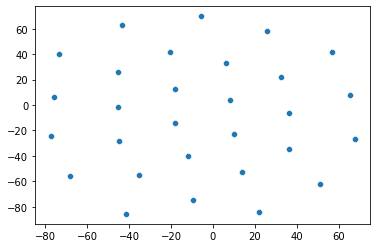

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# get a figure handle
# the figure gives the error because of the below lines . It is some how not taking the correct values of the label. hence the clustering is happening but 
#its not getying divided into the colors . May be it is beacuse of the gpu problem that my programm is not taking it . 
#fig,ax = plt.subplots(figsize=(10,8))
#sns.scatterplot(x=model_1, y=model_2, hue=labels,
#                palette=sns.color_palette("hls", num_clusters)).set(title="Wiki Article data T-SNE projection") 
sns.scatterplot(x=model_1, y=model_2)


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)
yes they do cluster together because of the tsne cluster function that has been used properly . also the cleanning of the data affected the function and training of  the vector of the text_vectors very well . 

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [5]:
# Import the train.txt and val.txt file into pandas dataframe format 

# train 
Xtrain = pd.read_csv('train.txt', sep=';',header=None)

# validation
Xval = pd.read_csv('val.txt', sep=';',header=None)

# and printout the train.shape and validation.shape 
print(Xtrain.shape)
print(Xval.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2)
(2000, 2)


In [6]:
Xtrain.sort_index()
Xval.sort_index()

,0,1
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [12]:
import numpy as np

print(type(Xtrain))
print(type(Xval))

Xtrain = np.asarray(Xtrain)
Xval = np.asarray(Xval)

print(type(Xtrain))
print(type(Xval))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xtrainlabels = enc.fit_transform(Xtrain[:,1].reshape(-1,1))

In [17]:
# clean the text in the train and validation dataframes using the clean_text function provided above
train = [clean_text(sentence) for sentence in Xtrain[:,0]]
val = [clean_text(sentence) for sentence in Xval[:,0]]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [18]:
# initialise count vectorizer from sklearn module with default parameter
vectorizer = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
Xtraincv = vectorizer.fit_transform(train)
Xvalcv = vectorizer.transform(val)

In [19]:
print(Xtraincv.shape)
print(Xvalcv.shape)

(16000, 13457)
(2000, 13457)


In [20]:
# initialise tfidf vectorizer from sklearn module with default parameter
vectorizer = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
Xtraintfidf = vectorizer.fit_transform(train)
Xvaltfidf = vectorizer.transform(val)

In [21]:
# initialise label encoder from sklearn module
from sklearn import preprocessing

# fit on train labels and transform both train and validation labels
le = preprocessing.LabelEncoder()
Xtrain[:,1] = le.fit_transform(Xtrain[:,1])

In [25]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xtrainlabels = enc.fit_transform(Xtrain[:,1].reshape(-1,1))
Xvallabels = enc.fit_transform(Xval[:,1].reshape(-1,1))

In [26]:
print(Xtrainlabels.shape)
print(Xvallabels.shape)

(16000, 6)
(2000, 6)


In [28]:
noofclasses = Xtrainlabels.shape[1]
print('Number of classes', noofclasses)

Number of classes 6


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inputs = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
  x = tf.keras.layers.Dense(2048, activation=tf.nn.relu)(inputs)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization (for the activation or the kernel weights or bias?)
  x = tf.keras.layers.Dense(1024, activation=tf.nn.tanh, kernel_regularizer='l2')(x)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(512, activation=tf.nn.tanh, kernel_regularizer='l2')(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(256, activation=tf.nn.tanh, kernel_regularizer='l2')(x)

  # layer 9 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(128, activation=tf.nn.tanh, kernel_regularizer='l2')(x)

  # layer 11 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 12 : output layer with units equal to number of classes and activation as softmax
  outputs = tf.keras.layers.Dense(n_classes, activation=tf.nn.softmax)(x)

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
  model = tf.keras.Model(inputs,outputs,name='EmotionDetector') 

return model


In [179]:
# call the build_model function and initialize the model
#print(X_train_cv.shape[1])
model = build_model(Xtraincv)

In [180]:
print(model.summary())

Model: "EmotionDetector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13457)]           0         
                                                                 
 dense_24 (Dense)            (None, 2048)              27561984  
                                                                 
 dropout_20 (Dropout)        (None, 2048)              0         
                                                                 
 dense_25 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               524800    
                                                                 
 dropout_22 (Dropout)        (None, 512)           

In [ ]:

# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
print(Xtraincv.shape)
print(Xtrainlabels.shape)
history = model.fit(Xtraincv.toarray(),Xtrainlabels, validation_data=(Xvalcv.toarray(),Xvallabels),
                    batch_size=64,epochs=10)
print(history.history.keys())

# Epoch gets printed as
#16000,13547
#16000,6

{'loss': [12.213534355163574, 8.102182388305664, 6.230099201202393, 5.04818058013916, 4.31946325302124, 3.7796614170074463, 3.3344130516052246, 3.0586626529693604, 2.705185890197754, 2.500269889831543], 'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'precision': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'recall': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'auc': [1.0, 1.0, 1.0, 0.9999999403953552, 1.0, 1.0, 0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 1.0], 'val_loss': [10.49362850189209, 8.521388053894043, 7.274882793426514, 6.507236957550049, 5.6523261070251465, 5.324667930603027, 4.874715805053711, 4.487972259521484, 4.4496941566467285, 4.4003005027771], 'val_acc': [0.2857142984867096, 0.2637362778186798, 0.2747252881526947, 0.2637362778186798, 0.16483516991138458, 0.2637362778186798, 0.2527472674846649, 0.2637362778186798, 0.2637362778186798, 0.2637362778186798], 'val_precision': [0.38461539149284363, 0.2142857164144516, 0.2686567306518

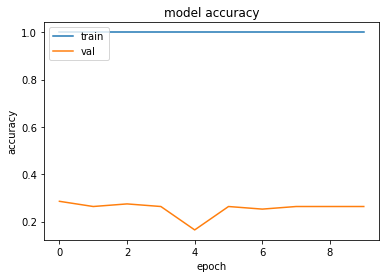

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

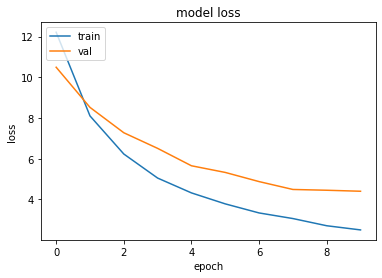

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

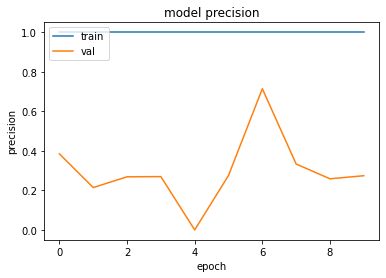

In [ ]:
# summarize history for accuracy
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

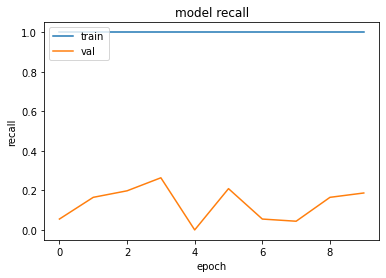

In [ ]:
# summarize history for accuracy
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

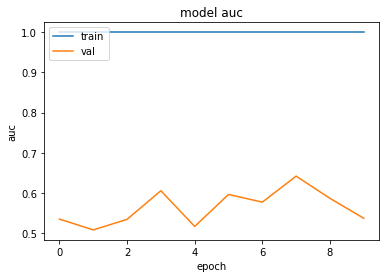

In [ ]:
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
# again call the build_model function and initialize the model
modeltfidf = build_model(Xtraintfidf)

In [47]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
modeltfidf.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
metrics=['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history = modeltfidf.fit(Xtraincv.toarray(),Xtrainlabels, validation_data=(Xvalcv.toarray(),Xvallabels),
                    batch_size=64,epochs=10)

Epoch 1/10
3/3 [==============================] - 3s 384ms/step - loss: 25.8040 - acc: 0.5556 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - auc_3: 0.6802 - val_loss: 22.4836 - val_acc: 0.2527 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3: 0.6122
Epoch 2/10
3/3 [==============================] - 0s 97ms/step - loss: 21.9555 - acc: 0.3333 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - auc_3: 0.7025 - val_loss: 20.8263 - val_acc: 0.2637 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3: 0.5320
Epoch 3/10
3/3 [==============================] - 0s 99ms/step - loss: 20.3913 - acc: 0.5556 - precision_3: 1.0000 - recall_3: 0.1111 - auc_3: 0.7012 - val_loss: 19.7022 - val_acc: 0.2637 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_3: 0.5685
Epoch 4/10
3/3 [==============================] - 0s 126ms/step - loss: 19.4334 - acc: 0.3333 - precision_3: 1.0000 - recall_3: 0.2222 - auc_3: 0.6543 - val_loss: 19.0347 - val_acc: 0.1868

In [49]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'precision_3', 'recall_3', 'auc_3', 'val_loss', 'val_acc', 'val_precision_3', 'val_recall_3', 'val_auc_3'])


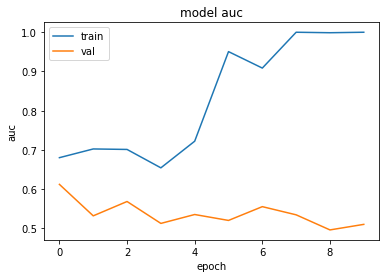

In [50]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors and also used the model processes the numerical data . 

In CountVectorizer we count the number of times a word appears in document that results in favouring the most occured words with the correct measures taken for the document. This ends up in ignoring rare words that helps in processing of the data
To overcome this , we use TfidfVectorizer 

Word2vec places the word in the feature space in a  way that the location is determined by the meaning i.e. words having similar meaning is meant to be clustered together and the distance between two words have the same meaning 

GloVe works to fit vectors to model a giant word co-occurrence matrix built from the corpus. 


**Answer:**


What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

Bag of Words just generates a set of vectors that has count of word occurrences in a particular document which can consist of review , while the TF-IDF model has the  information of more important words and the less important words too. 

TF means Term Frequency and IDF means Inverse Document Frequency. TF has can be compared to be same as as in BoW model. IDF  is inverse of number of document and their frequency that a particular term can appears by compensating rarity problem in BoW model
